In [2]:
import bff
from pathlib import Path

In [4]:
main_dir = Path('../').resolve()

train_dir = main_dir / '03-training-trjs/trainset'
fn_coord_aimd = [main_dir / f'01-prepare/cp2k/win-{i:03d}/pos.gro' for i in range(3)]
fn_topol_aimd = [main_dir / f'01-prepare/cp2k/win-{i:03d}/topol.top' for i in range(3)]
fn_trjs_aimd = [main_dir / f'02-reference-trjs/ace-{i:03d}.xtc' for i in range(3)]

fn_QoI = main_dir / '04-optimization/qoi.npz'

settings = {
    'rdf_kwargs': {'r_range': (1, 7), 'smooth': True},
    'hbond_kwargs': {},
    'restraint_kwargs': {'unbias': False}
}

fn_hyper = {
    'rdf': main_dir / '04-optimization/hyper-rdf.yaml',
    'hbond': main_dir / '04-optimization/hyper-hb.yaml',
    'restraint': main_dir / '04-optimization/hyper-restr.yaml',
}

In [1]:
2498 + 1313

3811

In [8]:
optimizer = bff.Optimizer(train_dir)

optimizer.load_train(
    workers=-1,
    fn_out=fn_QoI,
    start=10, stop=-1, step=1,
    progress_stride=1,
    **settings
)

optimizer.load_reference(
    fn_topol_aimd,
    fn_coord_aimd,
    fn_trjs_aimd,
    start=0, stop=-1, step=1)

optimizer.setup_lgp(QoI=['rdf', 'hb', 'restr'], fn_hyper=fn_hyper, device='cpu')

results = optimizer.run(n_max=15000, device='cpu')

     Byaesian Force Field Optimizer                                                                 
                                                                                                    
> loading training set: Done. (0s)                                                                  
                                                                                                    
> molecule: ACE                                                                                     
> parameters:                                                                                       
  charge CC                                                                                         
  charge CT3                                                                                        
  charge HA3                                                                                        
  charge OC                                                                                

Traceback (most recent call last):
  File "/home/vojta/miniforge3/envs/bffo/lib/python3.13/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vojta/code/BayesicForceFields/bff/bayes/inference.py", line 147, in log_posterior
    log_likelihood = log_likelihood_fn(theta)
  File "/home/vojta/code/BayesicForceFields/bff/bayes/likelihoods.py", line 120, in gaussian_log_likelihood
    y_trial_qoi = model.predict(params)
  File "/home/vojta/code/BayesicForceFields/bff/bayes/gaussian_process.py", line 134, in predict
    return torch.stack([lgp.predict(X) for lgp in self.lgps]).mean(dim=0)
                        ~~~~~~~~~~~^^^
  File "/home/vojta/code/BayesicForceFields/bff/bayes/gaussian_process.py", line 83, in predict
    Kid = gaussian_kernel(Xi, self.X_train, self.lengths, self.width)
  File "/home/vojta/code/BayesicForceFields/bff/bayes/utils.py", line 172, in wrapper
    r

KeyboardInterrupt: 

In [9]:
import numpy as np
from scipy.integrate import trapezoid
x = np.array([0.001, 0.0005, 0.00005])
y = np.array([167, 3500, 4600])
integral = trapezoid(y, x=x)

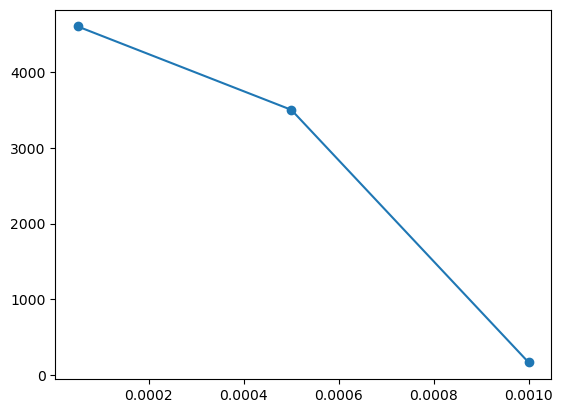

In [12]:
import matplotlib.pyplot as plt

plt.plot(x, y, marker='o')

In [8]:
results.get_chain()

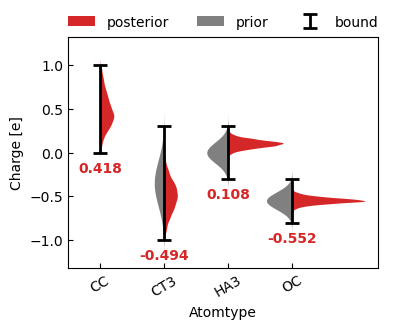

In [9]:
bff.postprocessing.plot_distributions(results)

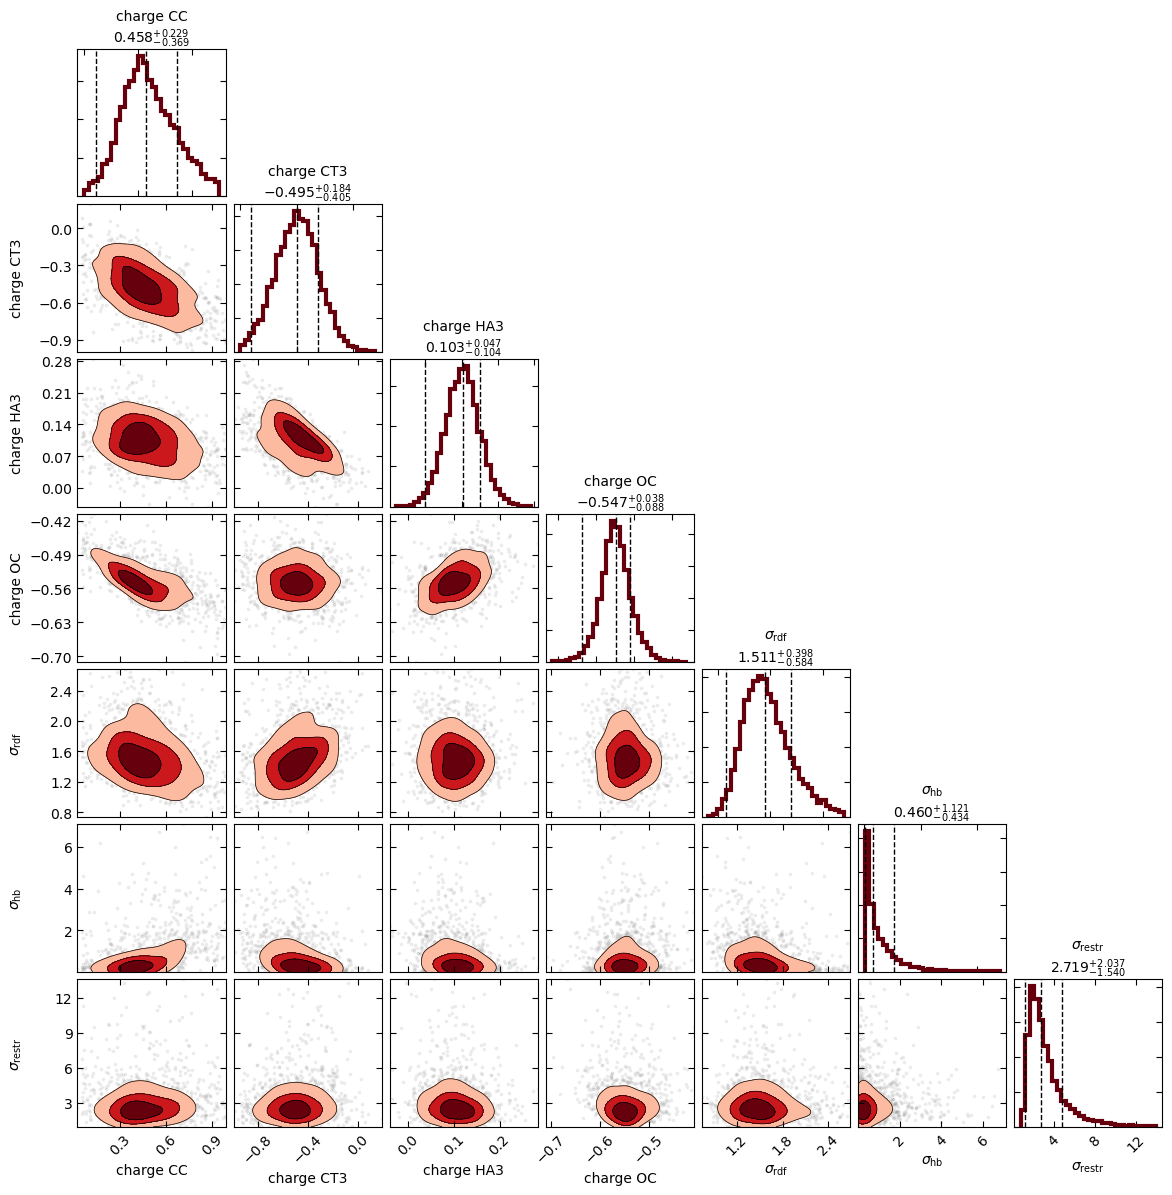

In [10]:
bff.postprocessing.plot_corner(results.chain_explicit_, results.labels_explicit_)